In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip '/content/drive/MyDrive/DIC Project/transactions_train.csv.zip' -d '/content/drive/MyDrive/DIC Project/'

In [ ]:
from os.path import exists
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
from wordcloud import WordCloud, STOPWORDS

# EDA

In [ ]:
articles = pd.read_csv("/content/drive/MyDrive/DIC Project/articles.csv")
customers = pd.read_csv("/content/drive/MyDrive/DIC Project/customers.csv")
transactions = pd.read_csv("/content/drive/MyDrive/DIC Project/transactions_train.csv")

In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return tt

In the article data, the only missing data is for the detailed description of the article (0.4% missing data).

In [ ]:
missing_data(articles)

,Total,Percent
detail_desc,416,0.394156
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000
section_no,0,0.000000
index_group_name,0,0.000000
index_group_no,0,0.000000
index_name,0,0.000000
index_code,0,0.000000


In [ ]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

Only customer id and postal code are completely filled. Age, fashion news frequency have arounfd 1% misssing data, FN has 65% missing and Active has 66% missing data.

In [ ]:
missing_data(customers)

,Total,Percent
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
postal_code,0,0.000000


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


No missing data from transactions data source.

In [ ]:
missing_data(transactions)

,Total,Percent
t_dat,0,0.0
customer_id,0,0.0
article_id,0,0.0
price,0,0.0
sales_channel_id,0,0.0


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [ ]:
unique_values(articles)

,Total,Uniques
article_id,105542,105542
product_code,105542,47224
prod_name,105542,45875
product_type_no,105542,132
product_type_name,105542,131
product_group_name,105542,19
graphical_appearance_no,105542,30
graphical_appearance_name,105542,30
colour_group_code,105542,50
colour_group_name,105542,50


In [ ]:
unique_values(customers)

,Total,Uniques
customer_id,1371980,1371980
FN,476930,1
Active,464404,1
club_member_status,1365918,3
fashion_news_frequency,1355971,4
age,1356119,84
postal_code,1371980,352899


In [ ]:
unique_values(transactions)

,Total,Uniques
t_dat,31788324,734
customer_id,31788324,1362281
article_id,31788324,104547
price,31788324,9857
sales_channel_id,31788324,2


We observe that not all the customers in customer data appears as having transactions in transaction train data. As well, not all articles are represented in this data. It is interesting that the number of different prices is quite small, out of 31.7M transactions, and for 1.3M customers, buying 104K different articles. Same for the dates, there are only 734 different dates.

In [ ]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=14)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

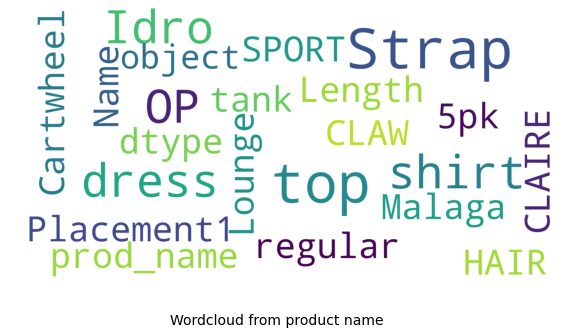

In [ ]:
show_wordcloud(articles["prod_name"], "Wordcloud from product name")

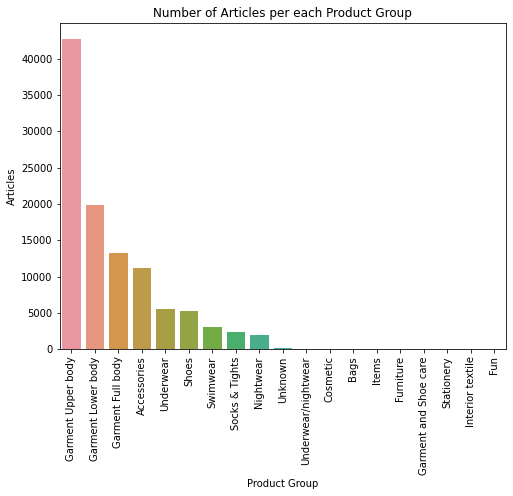

In [ ]:
temp = articles.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Articles per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

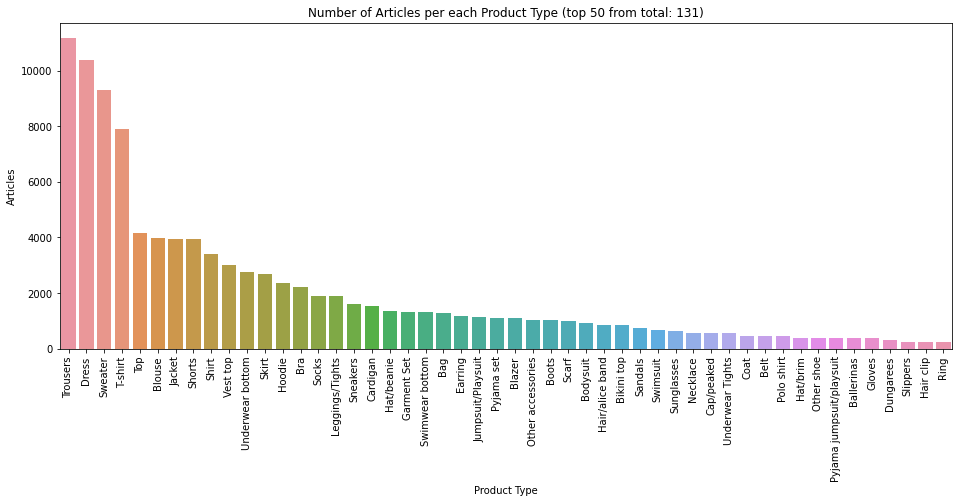

In [ ]:
temp = articles.groupby(["product_type_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Type': temp.index,
                   'Articles': temp.values
                  })
total_types = len(df['Product Type'].unique())
df = df.sort_values(['Articles'], ascending=False)[0:50]
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Product Type (top 50 from total: {total_types})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Type', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

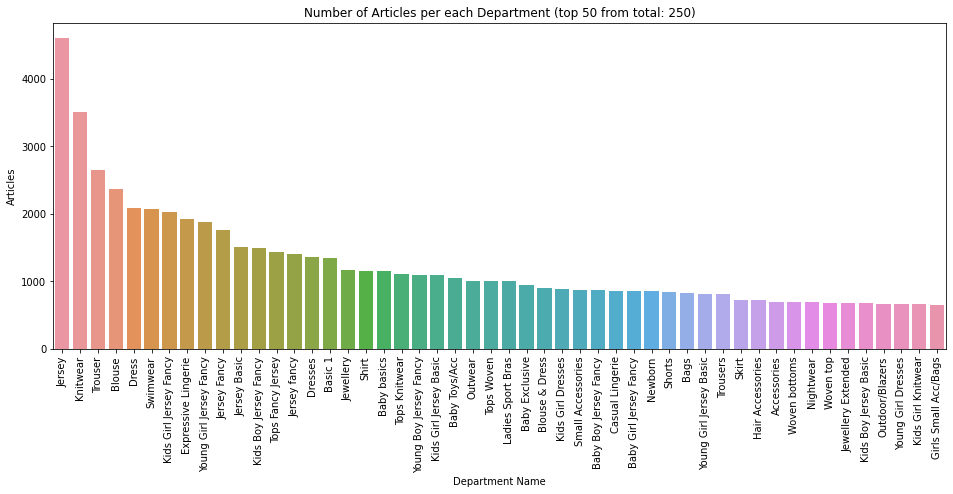

In [ ]:
temp = articles.groupby(["department_name"])["article_id"].nunique()
df = pd.DataFrame({'Department Name': temp.index,
                   'Articles': temp.values
                  })
total_depts = len(df['Department Name'].unique())
df = df.sort_values(['Articles'], ascending=False).head(50)
plt.figure(figsize = (16,6))
plt.title(f'Number of Articles per each Department (top 50 from total: {total_depts})')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Department Name', y="Articles", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

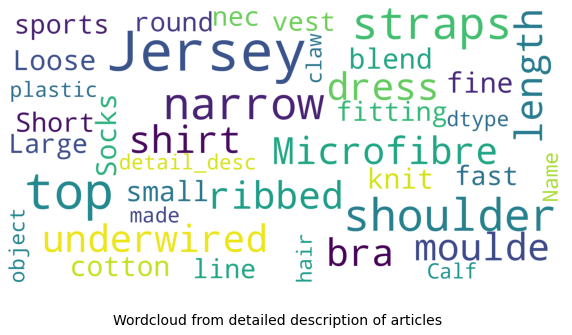

In [ ]:
show_wordcloud(articles["detail_desc"], "Wordcloud from detailed description of articles")

Ladieswear accounts for a significant part of all dresses. Sportswear has the least portion.

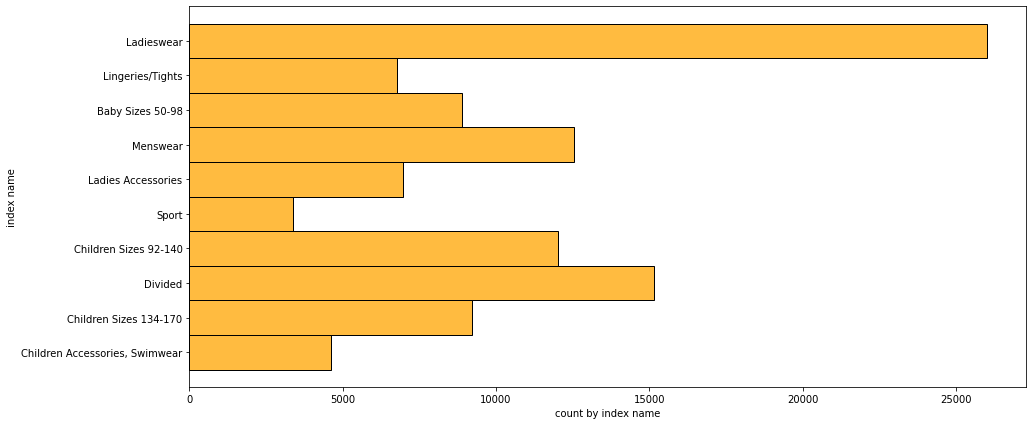

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_name', color='orange')
ax.set_xlabel('count by index name')
ax.set_ylabel('index name')
plt.show()

The garments grouped by index: Jersey fancy is the most frequent garment, especially for women and children. The next is accessories.

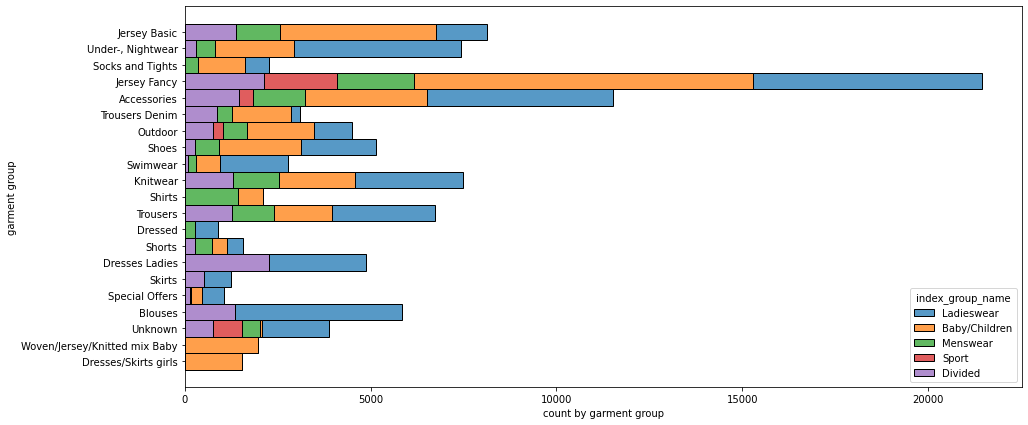

In [ ]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='garment_group_name', color='orange', hue='index_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

Seeing index group and index structure. Ladieswear and Children/Baby have subgroups.

In [ ]:
articles.groupby(['index_group_name', 'index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

Seeing at the product group and product structure. Accessories are really varied, the most numerous: bags, earrings and hats.

In [ ]:
pd.options.display.max_rows = None
articles.groupby(['product_group_name', 'product_type_name']).count()['article_id']

product_group_name     product_type_name       
Accessories            Accessories set                 7
                       Alice band                      6
                       Baby Bib                        3
                       Bag                          1280
                       Beanie                         56
                       Belt                          458
                       Bracelet                      180
                       Braces                          3
                       Bucket hat                      7
                       Cap                            13
                       Cap/peaked                    573
                       Dog Wear                       20
                       Earring                      1159
                       Earrings                       11
                       Eyeglasses                      2
                       Felt hat                       10
                       Giftbox          

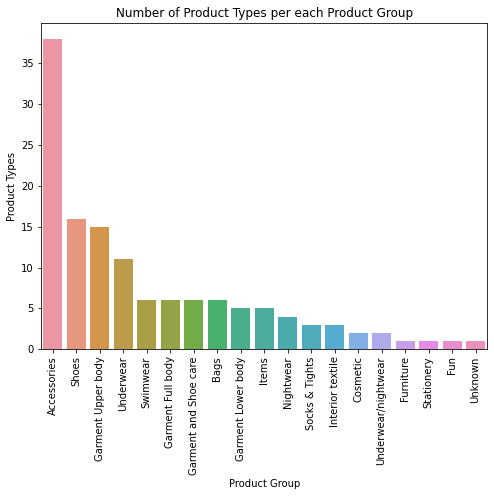

In [ ]:
temp = articles.groupby(["product_group_name"])["product_type_name"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Product Types': temp.values
                  })
df = df.sort_values(['Product Types'], ascending=False)
plt.figure(figsize = (8,6))
plt.title('Number of Product Types per each Product Group')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="Product Types", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Number of unique values in each column

In [ ]:
pd.options.display.max_rows = 10
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'n of unique {col}: {un_n}')

n of unique prod_name: 45875
n of unique product_type_name: 131
n of unique product_group_name: 19
n of unique graphical_appearance_name: 30
n of unique colour_group_name: 50
n of unique perceived_colour_value_name: 8
n of unique perceived_colour_master_name: 20
n of unique department_name: 250
n of unique index_name: 10
n of unique index_group_name: 5
n of unique section_name: 56
n of unique garment_group_name: 21
n of unique detail_desc: 43404


In [ ]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


There are no duplicates in customers

In [ ]:
customers.shape[0] - customers['customer_id'].nunique()

0

Here we have abnormal number of customers by one postal code. One has 120303, it might be encoded as NAN or it maybe a huge distribution center.

In [ ]:
data_postal = customers.groupby('postal_code', as_index=False).count().sort_values('customer_id', ascending=False)
data_postal.head()

,postal_code,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
61034,2c29ae653a9282cce4151bd87643c907644e09541abc28...,120303,42874,39886,118281,114377,118002
281937,cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac...,261,109,104,261,261,260
156090,714976379549eb90aae4a71bca6c7402cc646ae7c40f6c...,159,90,88,159,159,158
171208,7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5...,157,55,54,157,156,156
126228,5b7eb31eabebd3277de632b82267286d847fd5d44287ee...,156,42,41,156,156,155


The most common age is about 21-23

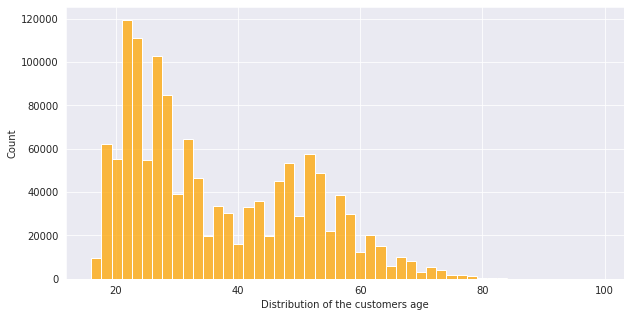

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=50, color='orange')
ax.set_xlabel('Distribution of the customers age')
plt.show()

Almost every customer has an active club status, some of them begun to activate it (pre-create). A tiny part of customers have left the club.

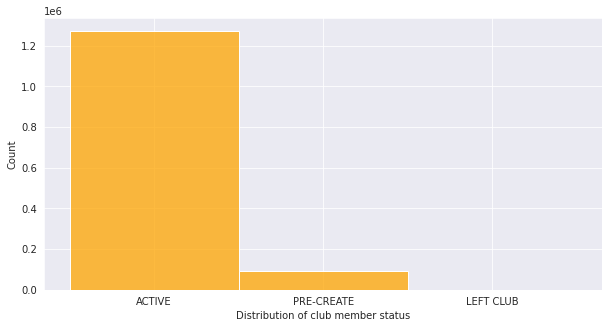

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='club_member_status', color='orange')
ax.set_xlabel('Distribution of club member status')
plt.show()

Here we have three types for no data. Let's unite these values.

In [ ]:
customers['fashion_news_frequency'].unique()

array(['NONE', 'Regularly', nan, 'Monthly', 'None'], dtype=object)

In [ ]:
customers.loc[~customers['fashion_news_frequency'].isin(['Regularly', 'Monthly']), 'fashion_news_frequency'] = 'None'
customers['fashion_news_frequency'].unique()

array(['None', 'Regularly', 'Monthly'], dtype=object)

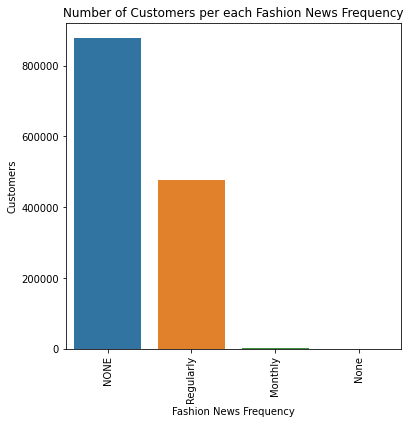

In [ ]:
temp = customers.groupby(["fashion_news_frequency"])["customer_id"].count()
df = pd.DataFrame({'Fashion News Frequency': temp.index,
                   'Customers': temp.values
                  })
df = df.sort_values(['Customers'], ascending=False)
plt.figure(figsize = (6,6))
plt.title(f'Number of Customers per each Fashion News Frequency')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Fashion News Frequency', y="Customers", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()

Customers prefer not to get any messages about the current news.

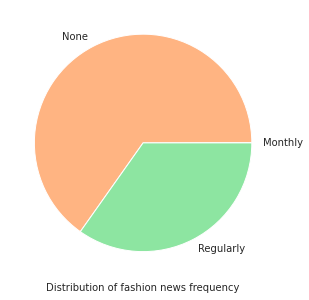

In [ ]:
pie_data = customers[['customer_id', 'fashion_news_frequency']].groupby('fashion_news_frequency').count()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
colors = sns.color_palette('pastel')
ax.pie(pie_data.customer_id, labels=pie_data.index, colors = colors)
ax.set_facecolor('lightgrey')
ax.set_xlabel('Distribution of fashion news frequency')
plt.show()

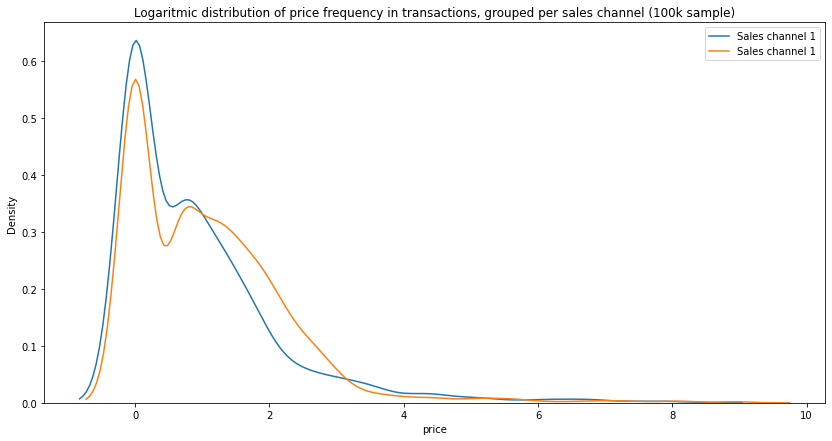

In [ ]:
df = transactions.sample(100_000)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==1].price.value_counts()))
sns.kdeplot(np.log(df.loc[df["sales_channel_id"]==2].price.value_counts()))
ax.legend(labels=['Sales channel 1', 'Sales channel 1'])
plt.title("Logaritmic distribution of price frequency in transactions, grouped per sales channel (100k sample)")
plt.show()

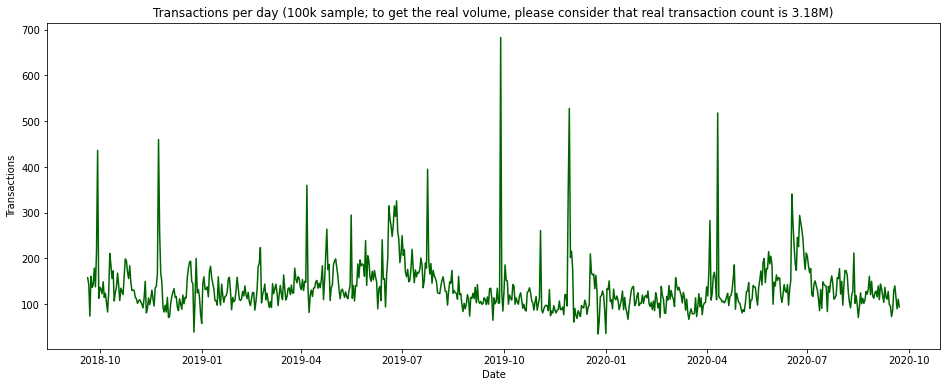

In [ ]:
from datetime import datetime
df = transactions.sample(100_000).groupby(["t_dat"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
plt.plot(df["Date"], df["Transactions"], color="Darkgreen")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.title(f"Transactions per day (100k sample; to get the real volume, please consider that real transaction count is {round(transactions.shape[0]/10.e6,2)}M)")
plt.show()

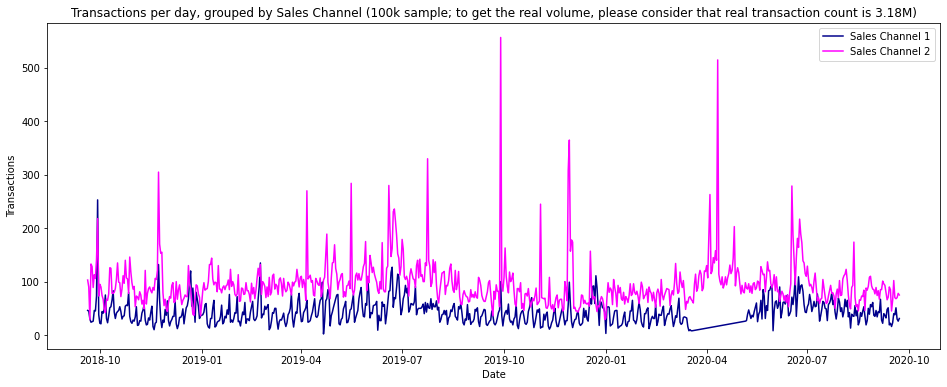

In [ ]:
df = transactions.sample(100_000).groupby(["t_dat", "sales_channel_id"])["article_id"].count().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Sales Channel Id", "Transactions"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Transactions"], label="Sales Channel 1", color="Darkblue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Transactions"], label="Sales Channel 2", color="Magenta")
plt.xlabel("Date")
plt.ylabel("Transactions")
ax.legend()
plt.title(f"Transactions per day, grouped by Sales Channel (100k sample; to get the real volume, please consider that real transaction count is {round(transactions.shape[0]/10.e6,2)}M)")
plt.show()

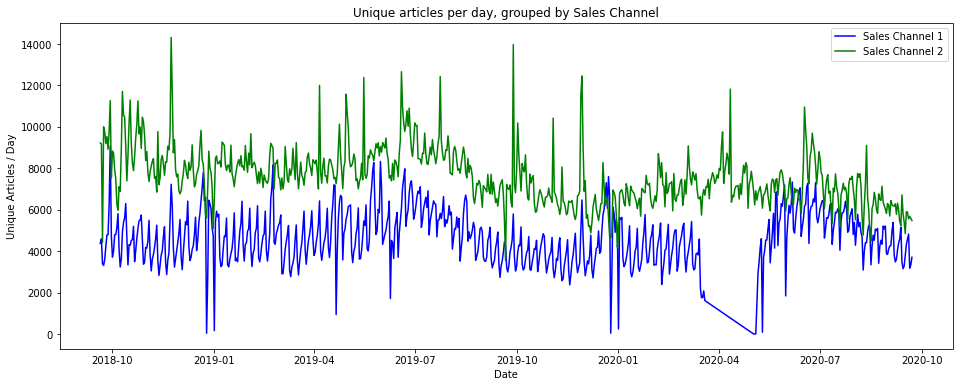

In [ ]:
df = transactions.groupby(["t_dat", "sales_channel_id"])["article_id"].nunique().reset_index()
df["t_dat"] = df["t_dat"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df.columns = ["Date", "Sales Channel Id", "Unique Articles"]
fig, ax = plt.subplots(1, 1, figsize=(16,6))
g1 = ax.plot(df.loc[df["Sales Channel Id"]==1, "Date"], df.loc[df["Sales Channel Id"]==1, "Unique Articles"], label="Sales Channel 1", color="Blue")
g2 = ax.plot(df.loc[df["Sales Channel Id"]==2, "Date"], df.loc[df["Sales Channel Id"]==2, "Unique Articles"], label="Sales Channel 2", color="Green")
plt.xlabel("Date")
plt.ylabel("Unique Articles / Day")
ax.legend()
plt.title(f"Unique articles per day, grouped by Sales Channel")
plt.show()

 Outliers concerning  price

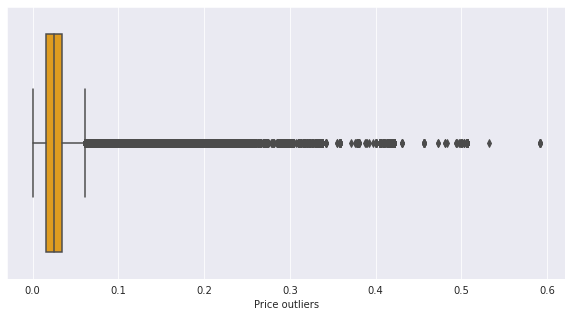

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.boxplot(data=transactions, x='price', color='orange')
ax.set_xlabel('Price outliers')
plt.show()

Top 10 customers by num of transactions.

In [ ]:
transactions_byid = transactions.groupby('customer_id').count()
transactions_byid.sort_values(by='price', ascending=False)['price'][:10]

customer_id
be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: price, dtype: int64

However, comparing prices inside groups is more accurate, because accessories and trousers prices may vary largerly.

Get subset from articles and merge it to transactions.

In [ ]:
articles_for_merge = articles[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]
articles_for_merge = transactions[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

Here we see outliers for group name prices. Lower, upper and full body garments have a huge price variance. It could be because they have unique collections, relative to casual ones. Some high price articles even belong to accessories group.

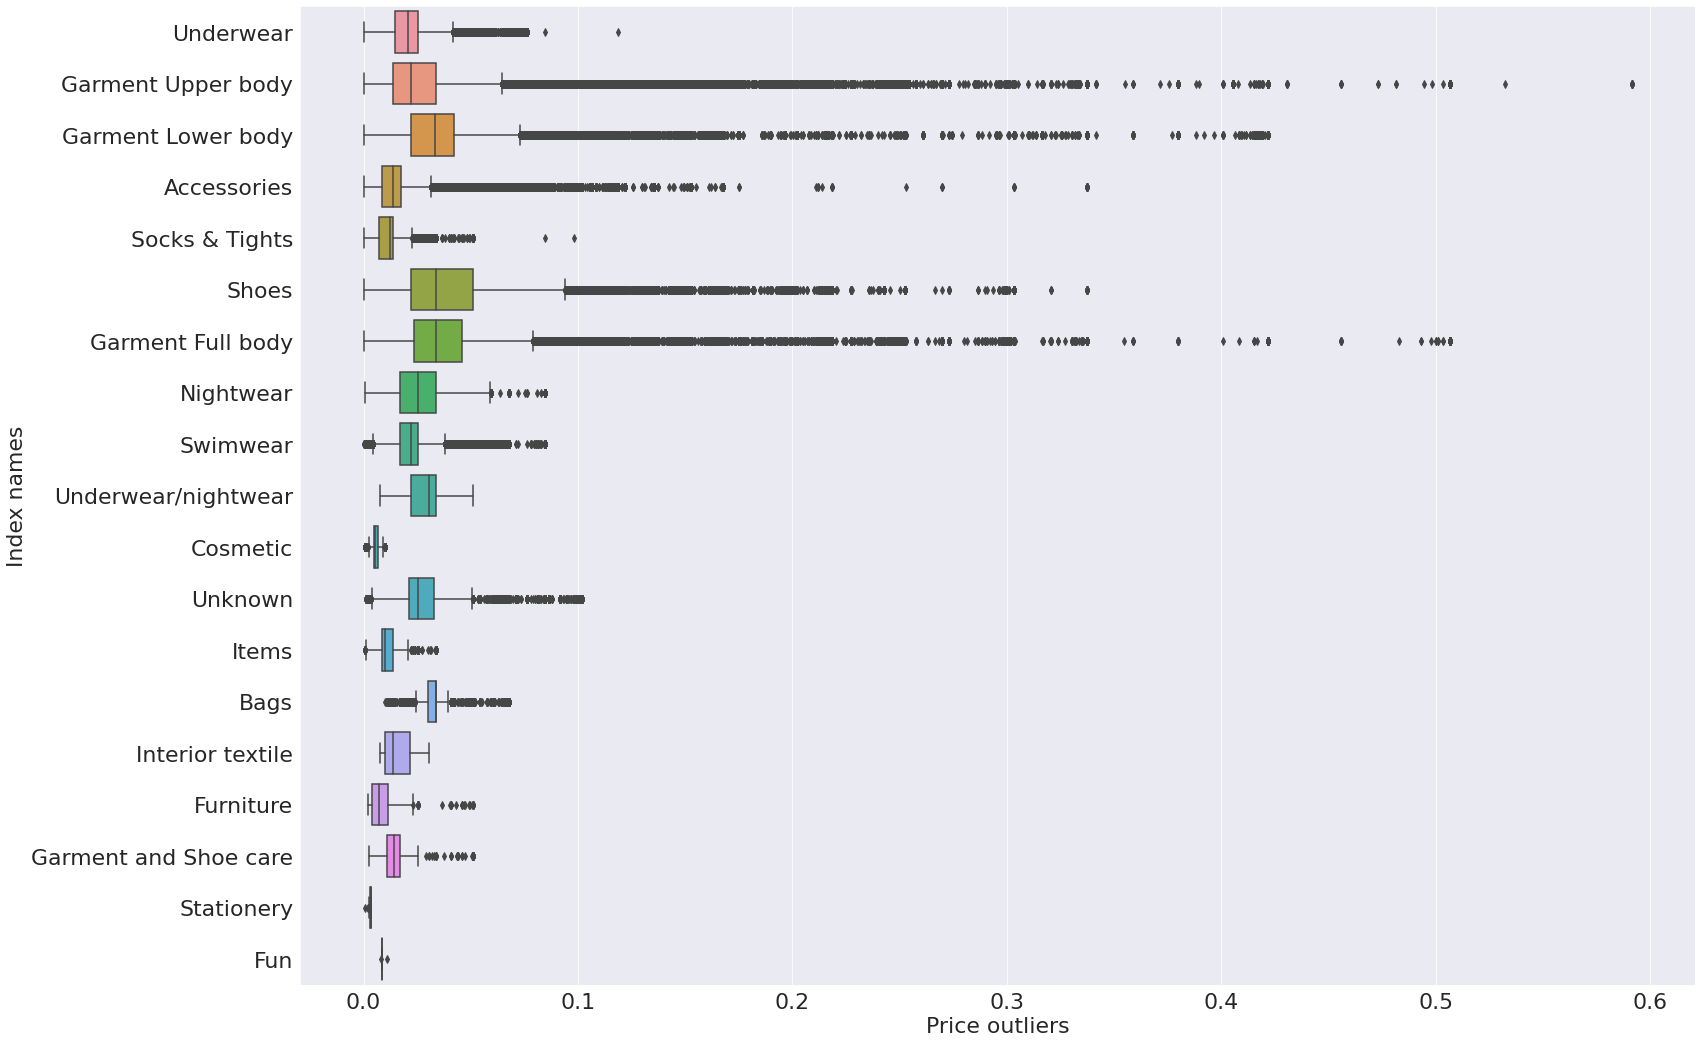

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
ax = sns.boxplot(data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
plt.show()

Then look at boxplot prices according to accessories product group and find the reasons of high prices inside that group.

The largest outliers can be found among bags. In addition, scarves and other accessories have articles with prices highly contrasting to the rest of garments.

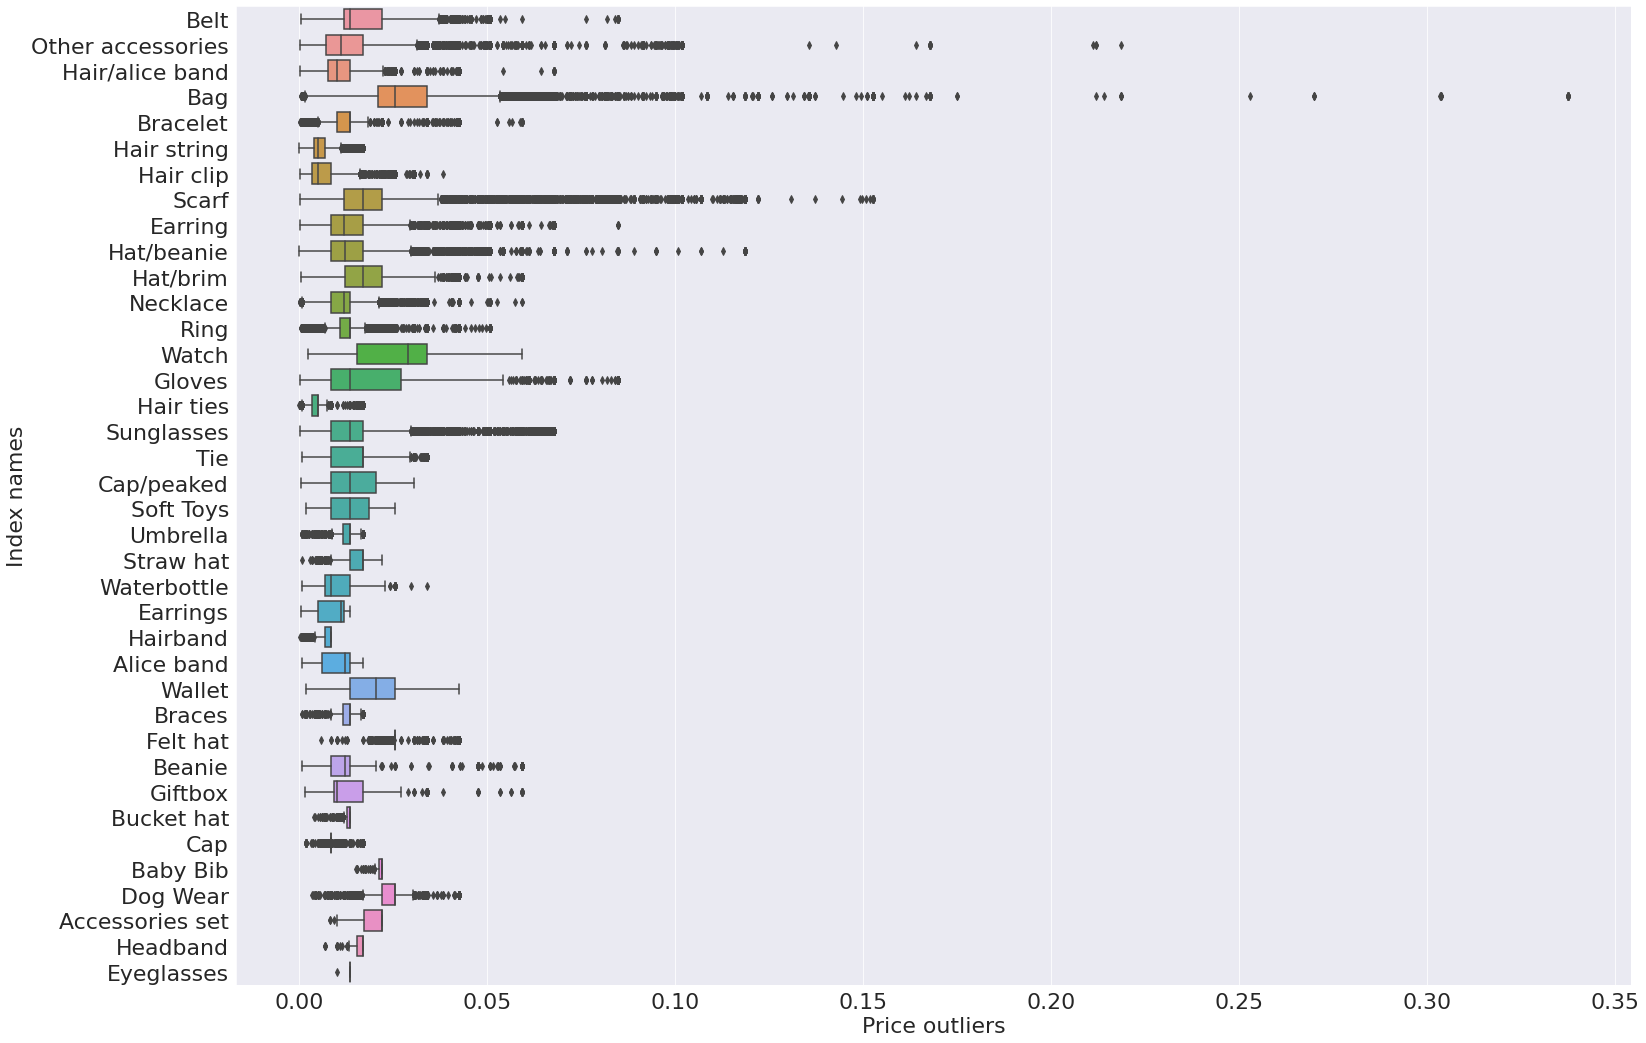

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
_ = articles_for_merge[articles_for_merge['product_group_name'] == 'Accessories']
ax = sns.boxplot(data=_, x='price', y='product_type_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)
del _

plt.show()

The index with the highest mean price is Ladieswear. The index with the lowest mean price is children.

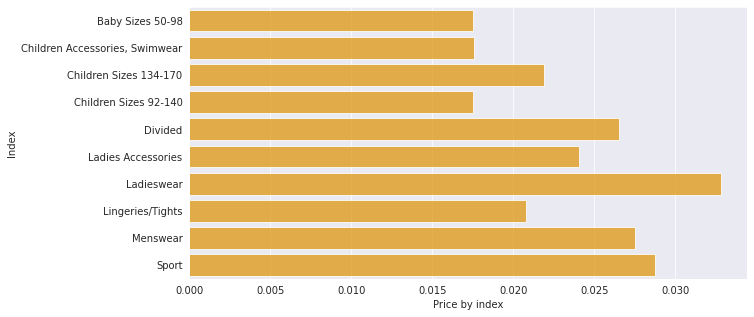

In [ ]:
articles_index = articles_for_merge[['index_name', 'price']].groupby('index_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by index')
ax.set_ylabel('Index')
plt.show()

Stationery has the lowest mean price. Shoes have the highest mean price.

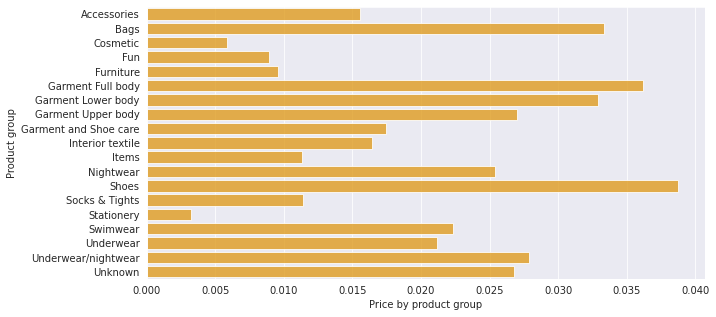

In [ ]:
articles_index = articles_for_merge[['product_group_name', 'price']].groupby('product_group_name').mean()
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=articles_index.price, y=articles_index.index, color='orange', alpha=0.8)
ax.set_xlabel('Price by product group')
ax.set_ylabel('Product group')
plt.show()

Checking the mean price change in time for top 5 product groups by mean price:

Shoes

Garment Full body

Bags

Garment Lower body

Underwear/nightwear

In [ ]:
articles_for_merge['t_dat'] = pd.to_datetime(articles_for_merge['t_dat'])

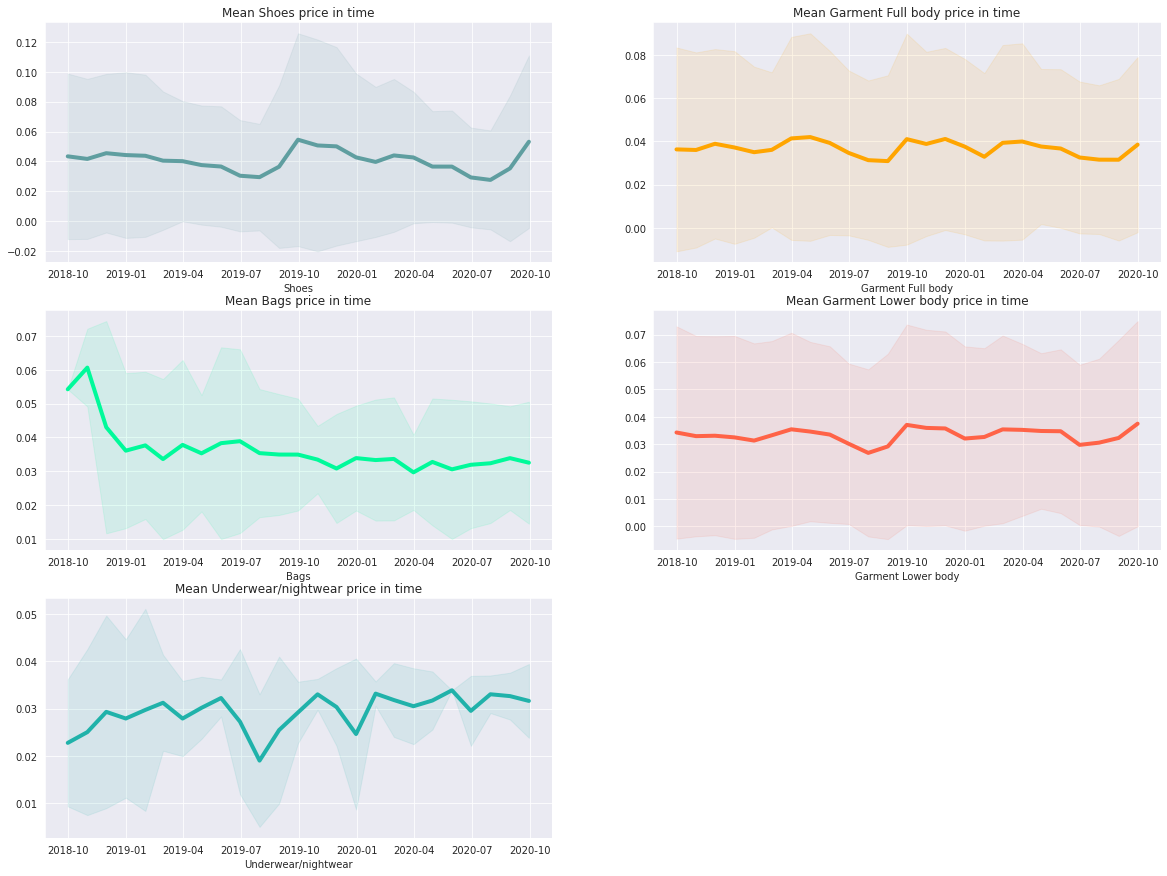

In [ ]:
product_list = ['Shoes', 'Garment Full body', 'Bags', 'Garment Lower body', 'Underwear/nightwear']
colors = ['cadetblue', 'orange', 'mediumspringgreen', 'tomato', 'lightseagreen']
k = 0
f, ax = plt.subplots(3, 2, figsize=(20, 15))
for i in range(3):
    for j in range(2):
        try:
            product = product_list[k]
            articles_for_merge_product = articles_for_merge[articles_for_merge.product_group_name == product_list[k]]
            series_mean = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).mean().fillna(0)
            series_std = articles_for_merge_product[['t_dat', 'price']].groupby(pd.Grouper(key="t_dat", freq='M')).std().fillna(0)
            ax[i, j].plot(series_mean, linewidth=4, color=colors[k])
            ax[i, j].fill_between(series_mean.index, (series_mean.values-2*series_std.values).ravel(), 
                             (series_mean.values+2*series_std.values).ravel(), color=colors[k], alpha=.1)
            ax[i, j].set_title(f'Mean {product_list[k]} price in time')
            ax[i, j].set_xlabel('month')
            ax[i, j].set_xlabel(f'{product_list[k]}')
            k += 1
        except IndexError:
            ax[i, j].set_visible(False)
plt.show()

In [ ]:
# LOAD TRANSACTIONS DATAFRAME
print('Transactions shape',transactions.shape)
transactions.head()

Transactions shape (31788324, 5)


,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
df1 = transactions.copy()
df1.article_id = df1.article_id.astype('int32')

In [ ]:
df1.t_dat = pd.to_datetime(df1.t_dat)

# Do customers buy the same product multiple times?

In [ ]:
#from re import A
# df_trans = pd.read_csv('/kaggle/input/h-and-m-personalized-fashion-recommendations/transactions_train.csv',dtype={'article_id': str})
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
transactions['article_id'] = str(transactions['article_id'])
df_trans = transactions[transactions['t_dat'] >= pd.to_datetime('2020-07-01')]


articles['article_id'] = str(articles['article_id'])

df = pd.merge(
    df_trans,
    articles,
    on='article_id',
    how='left'
)
df['product_code'] = df['product_code'].astype(str)
df['num_week'] = df['t_dat'].dt.isocalendar().week
df['product_code'] = df['product_code'].astype(str)

NameError: ignored

In [ ]:
import plotly.express as px
def do_customers_purchase_same_AGGKEY(df, agg_key):
    dfagg = df.groupby(['num_week','customer_id'])[[agg_key]].agg({
            agg_key: lambda x: ','.join(x)
    }).reset_index().rename(columns={agg_key: 'purchased_set'})
    dfagg['num_2wk_before'] = dfagg['num_week'] + 2
    dfagg = pd.merge(
        dfagg[['num_week','customer_id','purchased_set']],
        dfagg.rename(columns={'purchased_set': '2wk_before_purchased_set'})[['num_2wk_before','customer_id','2wk_before_purchased_set']],
        left_on=['num_week', 'customer_id'],
        right_on=['num_2wk_before', 'customer_id'],
        how='left'
    )
    dfagg['num_1wk_before'] = dfagg['num_week'] + 1
    dfagg = pd.merge(
        dfagg,
        dfagg.rename(columns={'purchased_set': '1wk_before_purchased_set'})[['num_1wk_before','customer_id','1wk_before_purchased_set']],
        left_on=['num_week', 'customer_id'],
        right_on=['num_1wk_before', 'customer_id'],
        how='left'
    )
    dfagg['num_3wk_before'] = dfagg['num_week'] + 3
    dfagg = pd.merge(
        dfagg,
        dfagg.rename(columns={'purchased_set': '3wk_before_purchased_set'})[['num_3wk_before','customer_id','3wk_before_purchased_set']],
        left_on=['num_week', 'customer_id'],
        right_on=['num_3wk_before', 'customer_id'],
        how='left'

    )
    dfagg = dfagg[['num_week','customer_id','purchased_set','1wk_before_purchased_set','2wk_before_purchased_set','3wk_before_purchased_set']]
    for col in ['purchased_set','1wk_before_purchased_set', '2wk_before_purchased_set', '3wk_before_purchased_set']:
        dfagg[col] = dfagg[col].fillna('')
        dfagg[col] = dfagg[col].str.split(',')
    dfagg['2wk_before_purchased_set'] = dfagg['2wk_before_purchased_set'] + dfagg['1wk_before_purchased_set']
    dfagg['3wk_before_purchased_set'] = dfagg['3wk_before_purchased_set'] + dfagg['2wk_before_purchased_set']
    for col in ['purchased_set','1wk_before_purchased_set', '2wk_before_purchased_set', '3wk_before_purchased_set']:
        dfagg[col] = dfagg[col].map(set)
    dfagg['is_purchased_same_within_1wk'] = (dfagg['purchased_set'] & dfagg['1wk_before_purchased_set']).astype(int)
    dfagg['is_purchased_same_within_2wk'] = (dfagg['purchased_set'] & dfagg['2wk_before_purchased_set']).astype(int)
    dfagg['is_purchased_same_within_3wk'] = (dfagg['purchased_set'] & dfagg['3wk_before_purchased_set']).astype(int)
    print(
        len(dfagg[dfagg['is_purchased_same_within_3wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100,
        len(dfagg[dfagg['is_purchased_same_within_2wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100,
        len(dfagg[dfagg['is_purchased_same_within_1wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100
    )
    df_vis = pd.DataFrame({
        'Pediod': ['Within_1wk', 'Within_2wk', 'Within_3wk'],
        'Ratio': [len(dfagg[dfagg['is_purchased_same_within_1wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100,
                  len(dfagg[dfagg['is_purchased_same_within_2wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100,
                  len(dfagg[dfagg['is_purchased_same_within_3wk'] == 1]['customer_id'].unique()) / len(dfagg['customer_id'].unique()) * 100]
    })
    fig = px.bar(df_vis, x='Pediod', y='Ratio')
    fig.show()
    return dfagg

Answer:

20.7% of customers will buy the same product in one week

28.1% will buy the same product within two weeks

32.6% will buy the same product within three weeks

In other words, most customers who purchase a product again purchase the same product within three weeks.

In [ ]:
dfagg_article = do_customers_purchase_same_AGGKEY(df, 'article_id')

32.630787677738674 28.125248951594617 20.6994952538336


# Find Items Purchased Together

In [ ]:
# FIND ITEMS PURCHASED TOGETHER
vc = df1.article_id.value_counts()
pairs = {}
for j,i in enumerate(vc.index.values[:32]):
    users = df1.loc[df1.article_id==i.item(),'customer_id'].unique()
    vc2 = df1.loc[(df1.customer_id.isin(users))&(df1.article_id!=i.item()),'article_id'].value_counts()
    pairs[i.item()] = [vc2.index[0], vc2.index[1], vc2.index[2]]

In [ ]:
pairs

{156231001: [228257001, 372860001, 111586001],
 158340001: [111586001, 111593001, 436261001],
 160442007: [160442010, 160442043, 372860001],
 351484002: [723529001, 699080001, 609719001],
 372860001: [372860002, 706016001, 608776002],
 372860002: [372860001, 706016001, 608776002],
 399223001: [706016001, 399223033, 706016002],
 399256001: [636323001, 399256018, 399256005],
 448509014: [706016001, 448509001, 706016002],
 464297007: [372860001, 706016001, 156231001],
 484398001: [564786001, 720125001, 706016001],
 554450001: [706016001, 554450027, 706016002],
 562245001: [562245046, 562245018, 706016001],
 562245046: [706016001, 562245001, 562245018],
 568601006: [568597006, 568601007, 706016001],
 573716012: [573716050, 783346001, 751471001],
 579541001: [579541004, 610776002, 678942001],
 590928001: [688537004, 599580017, 712924012],
 599580017: [684209004, 590928001, 688537004],
 608776002: [372860001, 160442007, 372860002],
 610776001: [610776002, 706016001, 706016002],
 610776002: [

# Find Each Customer's Last Week of Purchases

In [ ]:
tmp = df1.groupby('customer_id').t_dat.max().reset_index()
tmp.columns = ['customer_id','max_dat']
train = df1.merge(tmp,on=['customer_id'],how='left')
train['diff_dat'] = (train.max_dat - train.t_dat).dt.days
train = train.loc[train['diff_dat']<=6]
print('Train shape:',train.shape)

Train shape: (5181535, 7)


# Recommend Most Often Previously Purchased Items

In [ ]:
tmp = df1.groupby(['customer_id','article_id'])['t_dat'].agg('count').reset_index()
tmp.columns = ['customer_id','article_id','ct']
df2 = df1.merge(tmp,on=['customer_id','article_id'],how='left')
df2 = df2.sort_values(['ct','t_dat'],ascending=False)
df2 = df2.drop_duplicates(['customer_id','article_id'])
df2 = df2.sort_values(['ct','t_dat'],ascending=False)
df2.head()